In [51]:
import matplotlib.pyplot as plt
import numpy as np
import sunpy
import sunpy.map
import sunpy.visualization.colormaps
from astropy.io import fits
from astropy.visualization import ImageNormalize, LogStretch, AsinhStretch, ZScaleInterval
import astropy.units as u
import sunkit_image.radial as radial
from sunkit_image.utils import equally_spaced_bins
from 

In [62]:
aia_171_file = "../../src/AIA/AIA20170821_174645_0171.fits"
aia_193_file = "../../src/AIA/AIA20170821_172752_0193.fits"
aia_211_file = "../../src/AIA/AIA20170821_174645_0211.fits"

In [64]:
suvi_171_file = "../../src/SUVI/reprocessed_and_despiked/2017/08/21/171/G16_SUVI_171_L1b_s20170821T1744200_c20230424T2117201_le_v1-0-0.fits"
suvi_195_file = "../../src/SUVI/reprocessed_and_despiked/2017/08/21/195/G16_SUVI_195_L1b_s20170821T1726200_c20230424T2117401_le_v1-0-0.fits"
suvi_284_file = "../../src/SUVI/reprocessed_and_despiked/2017/08/21/284/G16_SUVI_284_L1b_s20170821T1744500_c20230424T2118302_le_v1-0-0.fits"

In [4]:
aia_171_map = sunpy.map.Map(aia_171_file)

In [5]:
aia_193_map = sunpy.map.Map(aia_193_file)

In [63]:
aia_211_map = sunpy.map.Map(aia_211_file)

In [15]:
with fits.open(suvi_171_file) as hdul:
    hdul.info()
    suvi_171_data = hdul[1].data
    suvi_171_hdr = hdul[1].header

Filename: ../../src/SUVI/reprocessed_and_despiked/2017/08/21/171/G16_SUVI_171_L1b_s20170821T1744200_c20230424T2117201_le_v1-0-0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  DATA          1 CompImageHDU    166   (1280, 1280)   float32   
  2  DQF           1 ImageHDU        24   (1280, 1280)   uint8   


In [16]:
suvi_171_map = sunpy.map.Map(suvi_171_data, suvi_171_hdr)

In [34]:
with fits.open(suvi_195_file) as hdul:
    hdul.info()
    suvi_195_data = hdul[1].data
    suvi_195_hdr = hdul[1].header

Filename: ../../src/SUVI/reprocessed_and_despiked/2017/08/21/195/G16_SUVI_195_L1b_s20170821T1726200_c20230424T2117401_le_v1-0-0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  DATA          1 CompImageHDU    166   (1280, 1280)   float32   
  2  DQF           1 ImageHDU        24   (1280, 1280)   uint8   


In [35]:
suvi_195_map = sunpy.map.Map(suvi_195_data, suvi_195_hdr)

In [65]:
with fits.open(suvi_284_file) as hdul:
    hdul.info()
    suvi_284_data = hdul[1].data
    suvi_284_hdr = hdul[1].header

Filename: ../../src/SUVI/reprocessed_and_despiked/2017/08/21/284/G16_SUVI_284_L1b_s20170821T1744500_c20230424T2118302_le_v1-0-0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  DATA          1 CompImageHDU    166   (1280, 1280)   float32   
  2  DQF           1 ImageHDU        24   (1280, 1280)   uint8   


In [66]:
suvi_284_map = sunpy.map.Map(suvi_284_data, suvi_284_hdr)

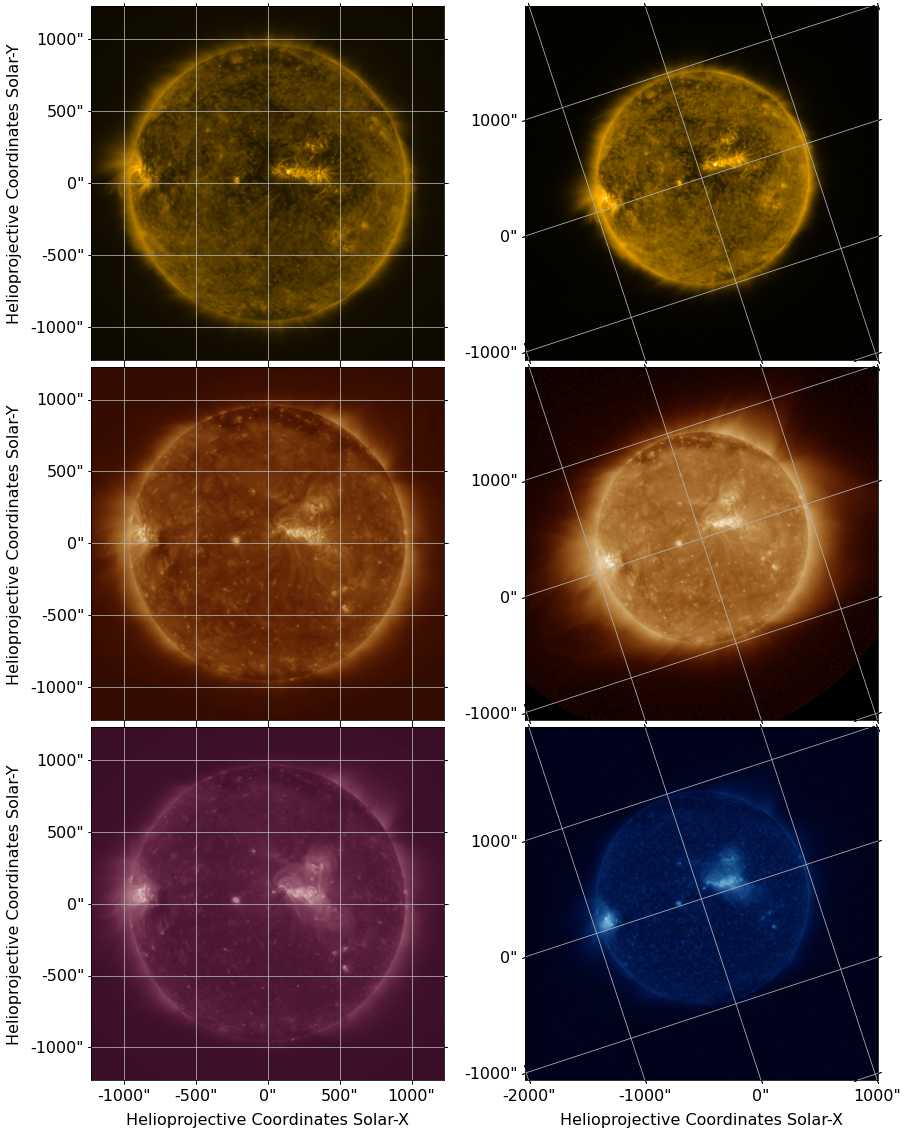

In [71]:
fig = plt.figure(figsize=(12,15),constrained_layout=True)

aia_171_norm = ImageNormalize(data=aia_171_map.data,stretch=AsinhStretch(0.01))
ax1 = fig.add_subplot(3,2,1,projection=aia_171_map,)
ax1.imshow(aia_171_map.data,cmap="sdoaia171",norm=aia_171_norm)


suvi_171_norm = ImageNormalize(data=suvi_171_map.data,stretch=AsinhStretch(0.01))
ax2 = fig.add_subplot(3,2,2,projection=suvi_171_map)
ax2.imshow(suvi_171_map.data,cmap="goes-rsuvi171",norm=suvi_171_norm)

aia_193_norm = ImageNormalize(data=aia_193_map.data,stretch=AsinhStretch(0.01))
ax3 = fig.add_subplot(3,2,3,projection=aia_193_map)
ax3.imshow(aia_193_map.data,cmap="sdoaia193",norm=aia_193_norm)


suvi_195_norm = ImageNormalize(data=suvi_195_map.data,vmin=0,stretch=LogStretch())
ax4 = fig.add_subplot(3,2,4,projection=suvi_195_map)
ax4.imshow(suvi_195_map.data,cmap="goes-rsuvi195",norm=suvi_195_norm)

aia_211_norm = ImageNormalize(data=aia_211_map.data,stretch=AsinhStretch(0.01))
ax5 = fig.add_subplot(3,2,5,projection=aia_211_map)
ax5.imshow(aia_211_map.data,cmap="sdoaia211",norm=aia_211_norm)

suvi_284_norm = ImageNormalize(data=suvi_284_map.data,stretch=AsinhStretch(0.01))
ax6 = fig.add_subplot(3,2,6,projection=suvi_284_map)
ax6.imshow(suvi_284_map.data,cmap="goes-rsuvi284",norm=suvi_284_norm)

for ax_ in (ax1,ax2,ax3,ax4,ax5,ax6):
    ax_.grid("on")
    ax_.set_ylabel(" ")
    ax_.set_xlabel(" ")
    ax_.tick_params(labelsize=16)

for ax_ in (ax1,ax2,ax3,ax4):
    ax_.tick_params(labelbottom=False,axis="x")

for ax_ in (ax1,ax3,ax5):
    ax_.set_ylabel("Helioprojective Coordinates Solar-Y",fontsize=16)

for ax_ in (ax5,ax6):
    ax_.set_xlabel("Helioprojective Coordinates Solar-X",fontsize=16)


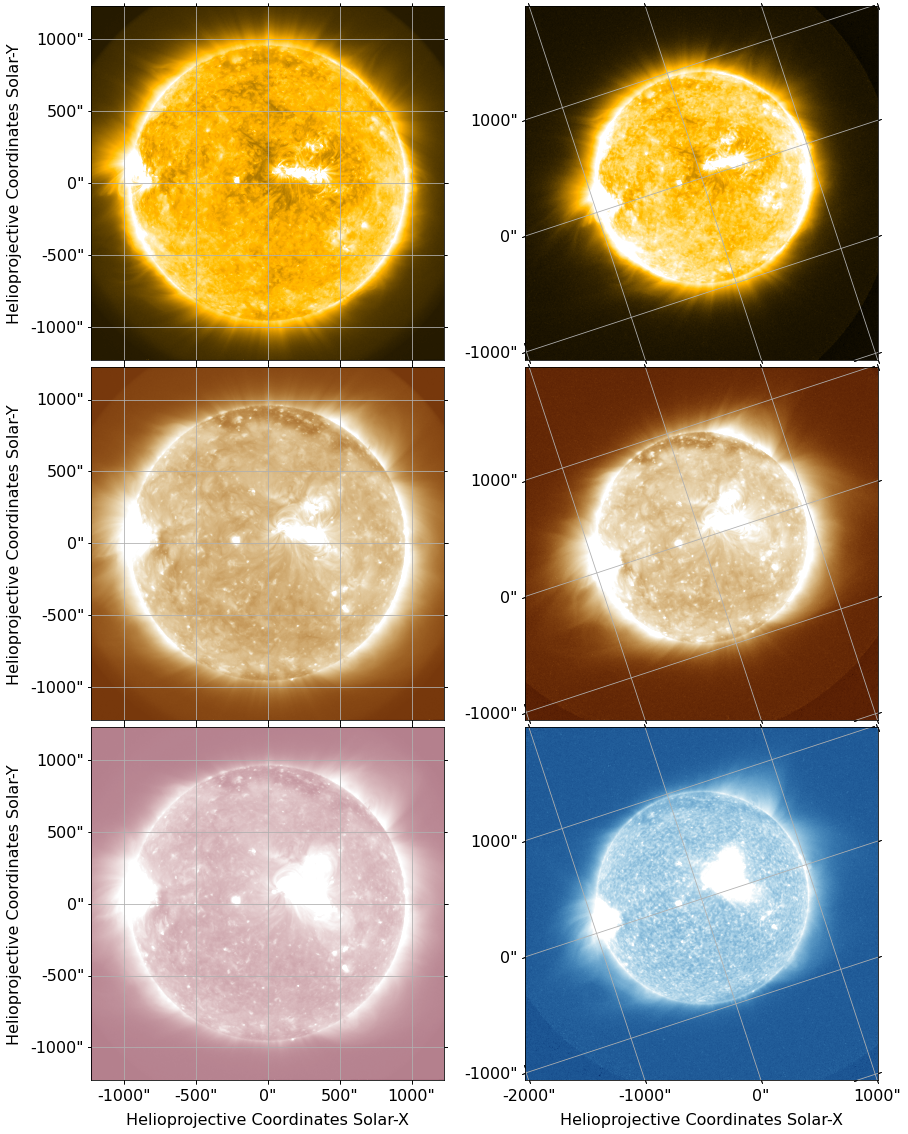

In [69]:
fig = plt.figure(figsize=(12,15),constrained_layout=True)

aia_171_norm = ImageNormalize(data=aia_171_map.data,interval=ZScaleInterval(),stretch=AsinhStretch(0.01))
ax1 = fig.add_subplot(3,2,1,projection=aia_171_map,)
ax1.imshow(aia_171_map.data,cmap="sdoaia171",norm=aia_171_norm)


suvi_171_norm = ImageNormalize(data=suvi_171_map.data,interval=ZScaleInterval(),stretch=AsinhStretch(0.01))
ax2 = fig.add_subplot(3,2,2,projection=suvi_171_map)
ax2.imshow(suvi_171_map.data,cmap="goes-rsuvi171",norm=suvi_171_norm)

aia_193_norm = ImageNormalize(data=aia_193_map.data,interval=ZScaleInterval(),stretch=AsinhStretch(0.01))
ax3 = fig.add_subplot(3,2,3,projection=aia_193_map)
ax3.imshow(aia_193_map.data,cmap="sdoaia193",norm=aia_193_norm)


suvi_195_norm = ImageNormalize(data=suvi_195_map.data,interval=ZScaleInterval(),stretch=AsinhStretch(0.01))
ax4 = fig.add_subplot(3,2,4,projection=suvi_195_map)
ax4.imshow(suvi_195_map.data,cmap="goes-rsuvi195",norm=suvi_195_norm)

aia_211_norm = ImageNormalize(data=aia_211_map.data,interval=ZScaleInterval(),stretch=AsinhStretch(0.01))
ax5 = fig.add_subplot(3,2,5,projection=aia_211_map)
ax5.imshow(aia_211_map.data,cmap="sdoaia211",norm=aia_211_norm)

suvi_284_norm = ImageNormalize(data=suvi_284_map.data,interval=ZScaleInterval(),stretch=AsinhStretch(0.01))
ax6 = fig.add_subplot(3,2,6,projection=suvi_284_map)
ax6.imshow(suvi_284_map.data,cmap="goes-rsuvi284",norm=suvi_284_norm)

for ax_ in (ax1,ax2,ax3,ax4,ax5,ax6):
    ax_.grid("on")
    ax_.set_ylabel(" ")
    ax_.set_xlabel(" ")
    ax_.tick_params(labelsize=16)

for ax_ in (ax1,ax2,ax3,ax4):
    ax_.tick_params(labelbottom=False,axis="x")

for ax_ in (ax1,ax3,ax5):
    ax_.set_ylabel("Helioprojective Coordinates Solar-Y",fontsize=16)

for ax_ in (ax5,ax6):
    ax_.set_xlabel("Helioprojective Coordinates Solar-X",fontsize=16)


In [55]:
def apply_fngrf(map, order=20, rmin=1, rmax=2, nbins=100):
    radial_bin_edges = equally_spaced_bins(inner_value=rmin, outer_value=rmax, nbins=nbins)
    radial_bin_edges *= u.R_sun
    attenuation_coefficients = radial.set_attenuation_coefficients(order)

    return radial.fnrgf(map, radial_bin_edges, order, attenuation_coefficients)


In [56]:
aia_193_map_fngrf = apply_fngrf(aia_193_map)

In [59]:
suvi_195_map_fngrf = apply_fngrf(suvi_195_map)

See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]


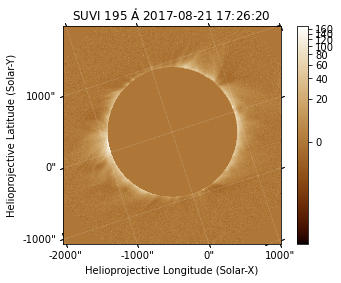

In [70]:
suvi_195_map_fngrf.peek()